# Remote Work & Mental Health 🌍🧠

This dataset cames from the [Kaggle](https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health).

This dataset examines the impact of remote work on mental health, gathering responses from individuals across various demographics. It includes key metrics such as job satisfaction, anxiety levels, and work-life balance.

Index:
1. [Reading the Data](#1.-Reading-the-Data)
2. [Data Cleaning](mental_health.ipynb#data-cleaning)

Hipóteses

1. objetivo: estudar o impacto do remote work na nossa saude mental

2
a) detalhar a população a nível pessoal: x pessoas, percentagem de cada genero (Gender) e utilizar Region e Year  
b) detalhar a população a nível de trabalho e no work location  

3) testar hipóteses:
   - será que existe regiões onde o remote work impacta mais a nossa saúde mental?
   - verificar se existe profissões onde trabalhar remotamente impacta mais a nossa saude mental?
   - será que o número de reuniões e/ou número de horas tem efeito?
   - será que praticar desporto e/ou dormir bem tem impacto?
   - será que existe uma correlação entre pessoas novas e doenças mentais? (+ novas, +probabilidade de doenças?)
   - será que é possível encontrar um perfil mais provavel de não se adaptar bem ao remote work?
   - será que as pessoas com maior social isolation rating estão mais satisfeitas com o remote work?
   ou pode levar situações de stress e ansiedade?



## Reading the data

In [119]:
import pandas as pd

In [120]:
file = "kaggle/input/Impact_of_Remote_Work_on_Mental_Health.csv"
df = pd.read_csv(file, encoding="utf-8")

df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [121]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

## Dataset Descriptive Statistics

### People Demographics

In [122]:
print('Population statistics')
print('--'*20)
print(f'Total de pessoas: {df.shape[0]}')
print(f'Média de idade: {df["Age"].mean():.0f}')
print(f'Média de anos de experiência: {df["Years_of_Experience"].mean():.0f}')

Population statistics
----------------------------------------
Total de pessoas: 5000
Média de idade: 41
Média de anos de experiência: 18


----------------------------------------


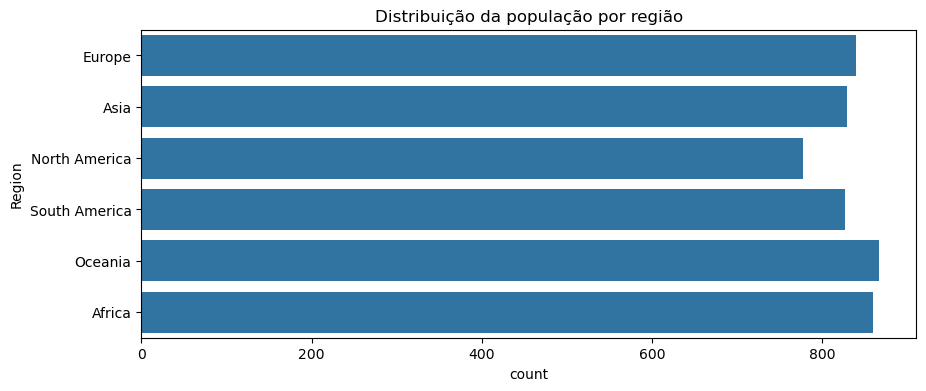

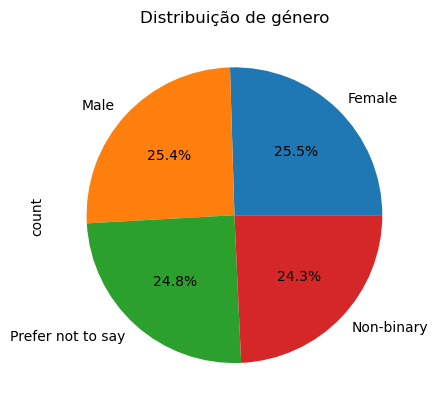

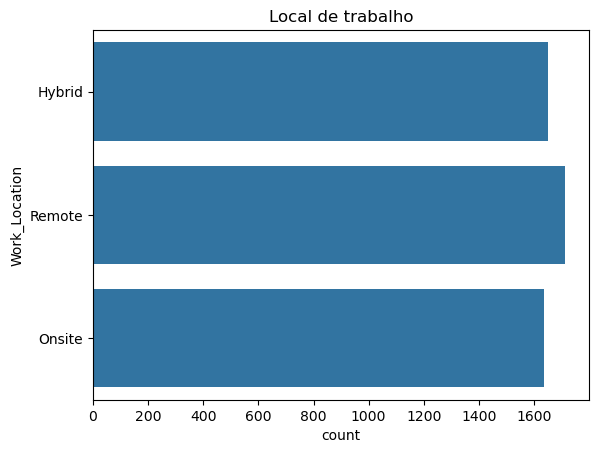

In [123]:
print('--'*20)
# Bar chart of region distribution using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.countplot(data=df, y='Region')
plt.title('Distribuição da população por região')
plt.show()

# Gender
df.Gender.value_counts().plot.pie(autopct='%1.1f%%') #type: ignore
plt.title('Distribuição de género')

plt.show()

# Work Location
sns.countplot(data=df, y='Work_Location')
plt.title('Local de trabalho')

plt.show()

In [124]:
# Dataframe describe
df.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


## Data Cleaning

### Fill NaN

In [125]:
print('Verificar se existem valores nulos')
print('--'*20)
df.isna().sum()

Verificar se existem valores nulos
----------------------------------------


Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

There are empty values for the columns Mental_Health_Condition and Physical_Activity.

These values make sense, as they mean absence of mental health condition and absence of physical activity.

Thus, we will fill these empty values with the string "None".

In [126]:
print('Before the fillna')
print('--'*20)
print(df.Mental_Health_Condition.value_counts(dropna=False))
print(df.Physical_Activity.value_counts(dropna=False))

df.Mental_Health_Condition = df.Mental_Health_Condition.fillna('No Condition')
df.Physical_Activity = df.Physical_Activity.fillna('No Activity')

print('After the fillna')
print('--'*20)
print(df.Mental_Health_Condition.value_counts(dropna=False))
print(df.Physical_Activity.value_counts(dropna=False))


Before the fillna
----------------------------------------
Mental_Health_Condition
Burnout       1280
Anxiety       1278
Depression    1246
NaN           1196
Name: count, dtype: int64
Physical_Activity
Weekly    1755
NaN       1629
Daily     1616
Name: count, dtype: int64
After the fillna
----------------------------------------
Mental_Health_Condition
Burnout         1280
Anxiety         1278
Depression      1246
No Condition    1196
Name: count, dtype: int64
Physical_Activity
Weekly         1755
No Activity    1629
Daily          1616
Name: count, dtype: int64


## Plotting

### Será que existe regiões onde o remote work impacta mais a nossa saúde mental

In [127]:
df[['Region', 'Mental_Health_Condition']].groupby(['Region', 'Mental_Health_Condition']).agg(Diasease=('Mental_Health_Condition', 'count'))

Diasease
Region        Mental_Health_Condition          
Africa        Anxiety                       217
              Burnout                       217
              Depression                    212
              No Condition                  214
Asia          Anxiety                       228
              Burnout                       226
              Depression                    197
              No Condition                  178
Europe        Anxiety                       212
              Burnout                       221
              Depression                    206
              No Condition                  201
North America Anxiety                       196
              Burnout                       203
              Depression                    189
              No Condition                  189
Oceania       Anxiety                       219
              Burnout                       218
              Depression                    215
              No Condition                  215
South America Anxiety                       206
              Burnout                       195
              Depression                    227
              No Condition                  199

<Axes: xlabel='Region', ylabel='Count'>

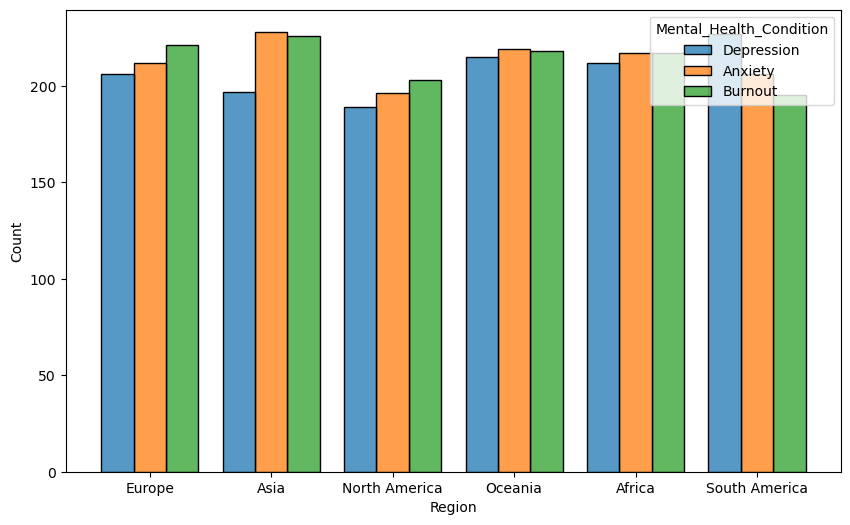

In [128]:
plt.figure(figsize=(10, 6))
df_ = df[~(df['Mental_Health_Condition'] == 'No Condition')]
sns.histplot(data=df_, x="Region", hue="Mental_Health_Condition", multiple="dodge", shrink=.8)

Verificar se existe profissões onde trabalhar remotamente impacta mais a nossa saude mental?

<Axes: xlabel='Industry', ylabel='Count'>

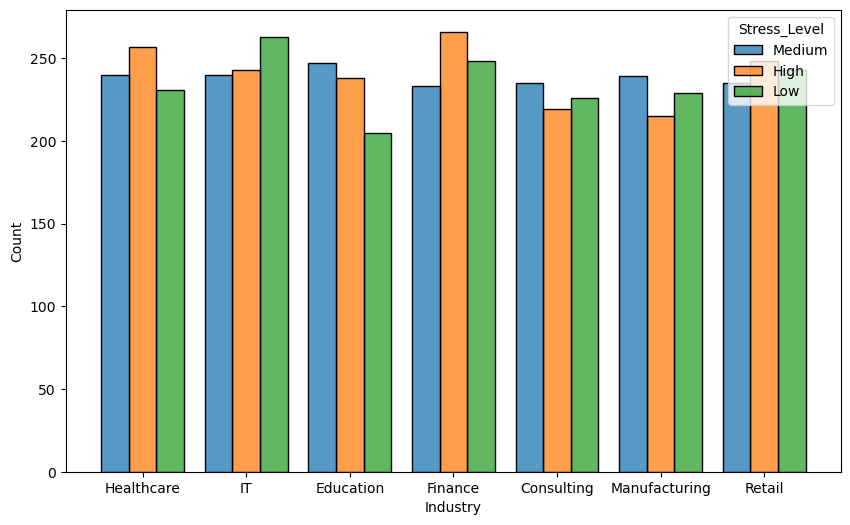

In [129]:
x = 'Industry'
y = 'Stress_Level'
df[[x, y]].groupby([x, y]).agg(Diasease=(y, 'count'))
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=x, hue=y, multiple="dodge", shrink=.8)

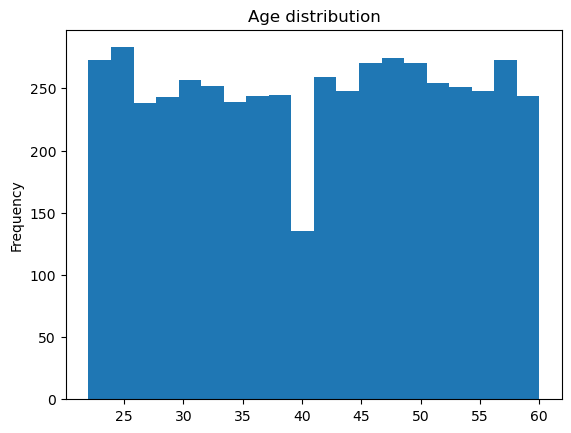

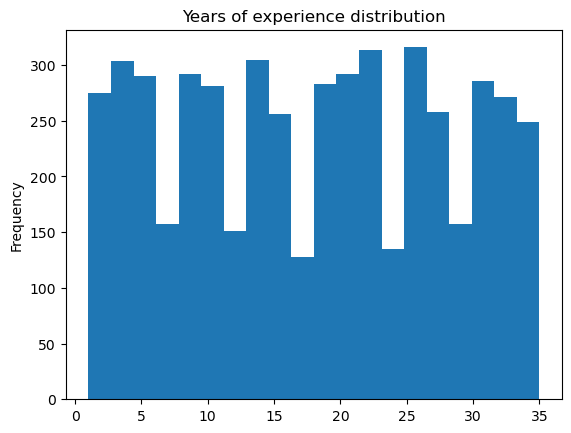

In [130]:
# Histograms
plt.title('Age distribution')
df.Age.plot.hist(bins=20)
plt.show()

plt.title('Years of experience distribution')
df.Years_of_Experience.plot.hist(bins=20)
plt.show()

<Figure size 1000x400 with 0 Axes>

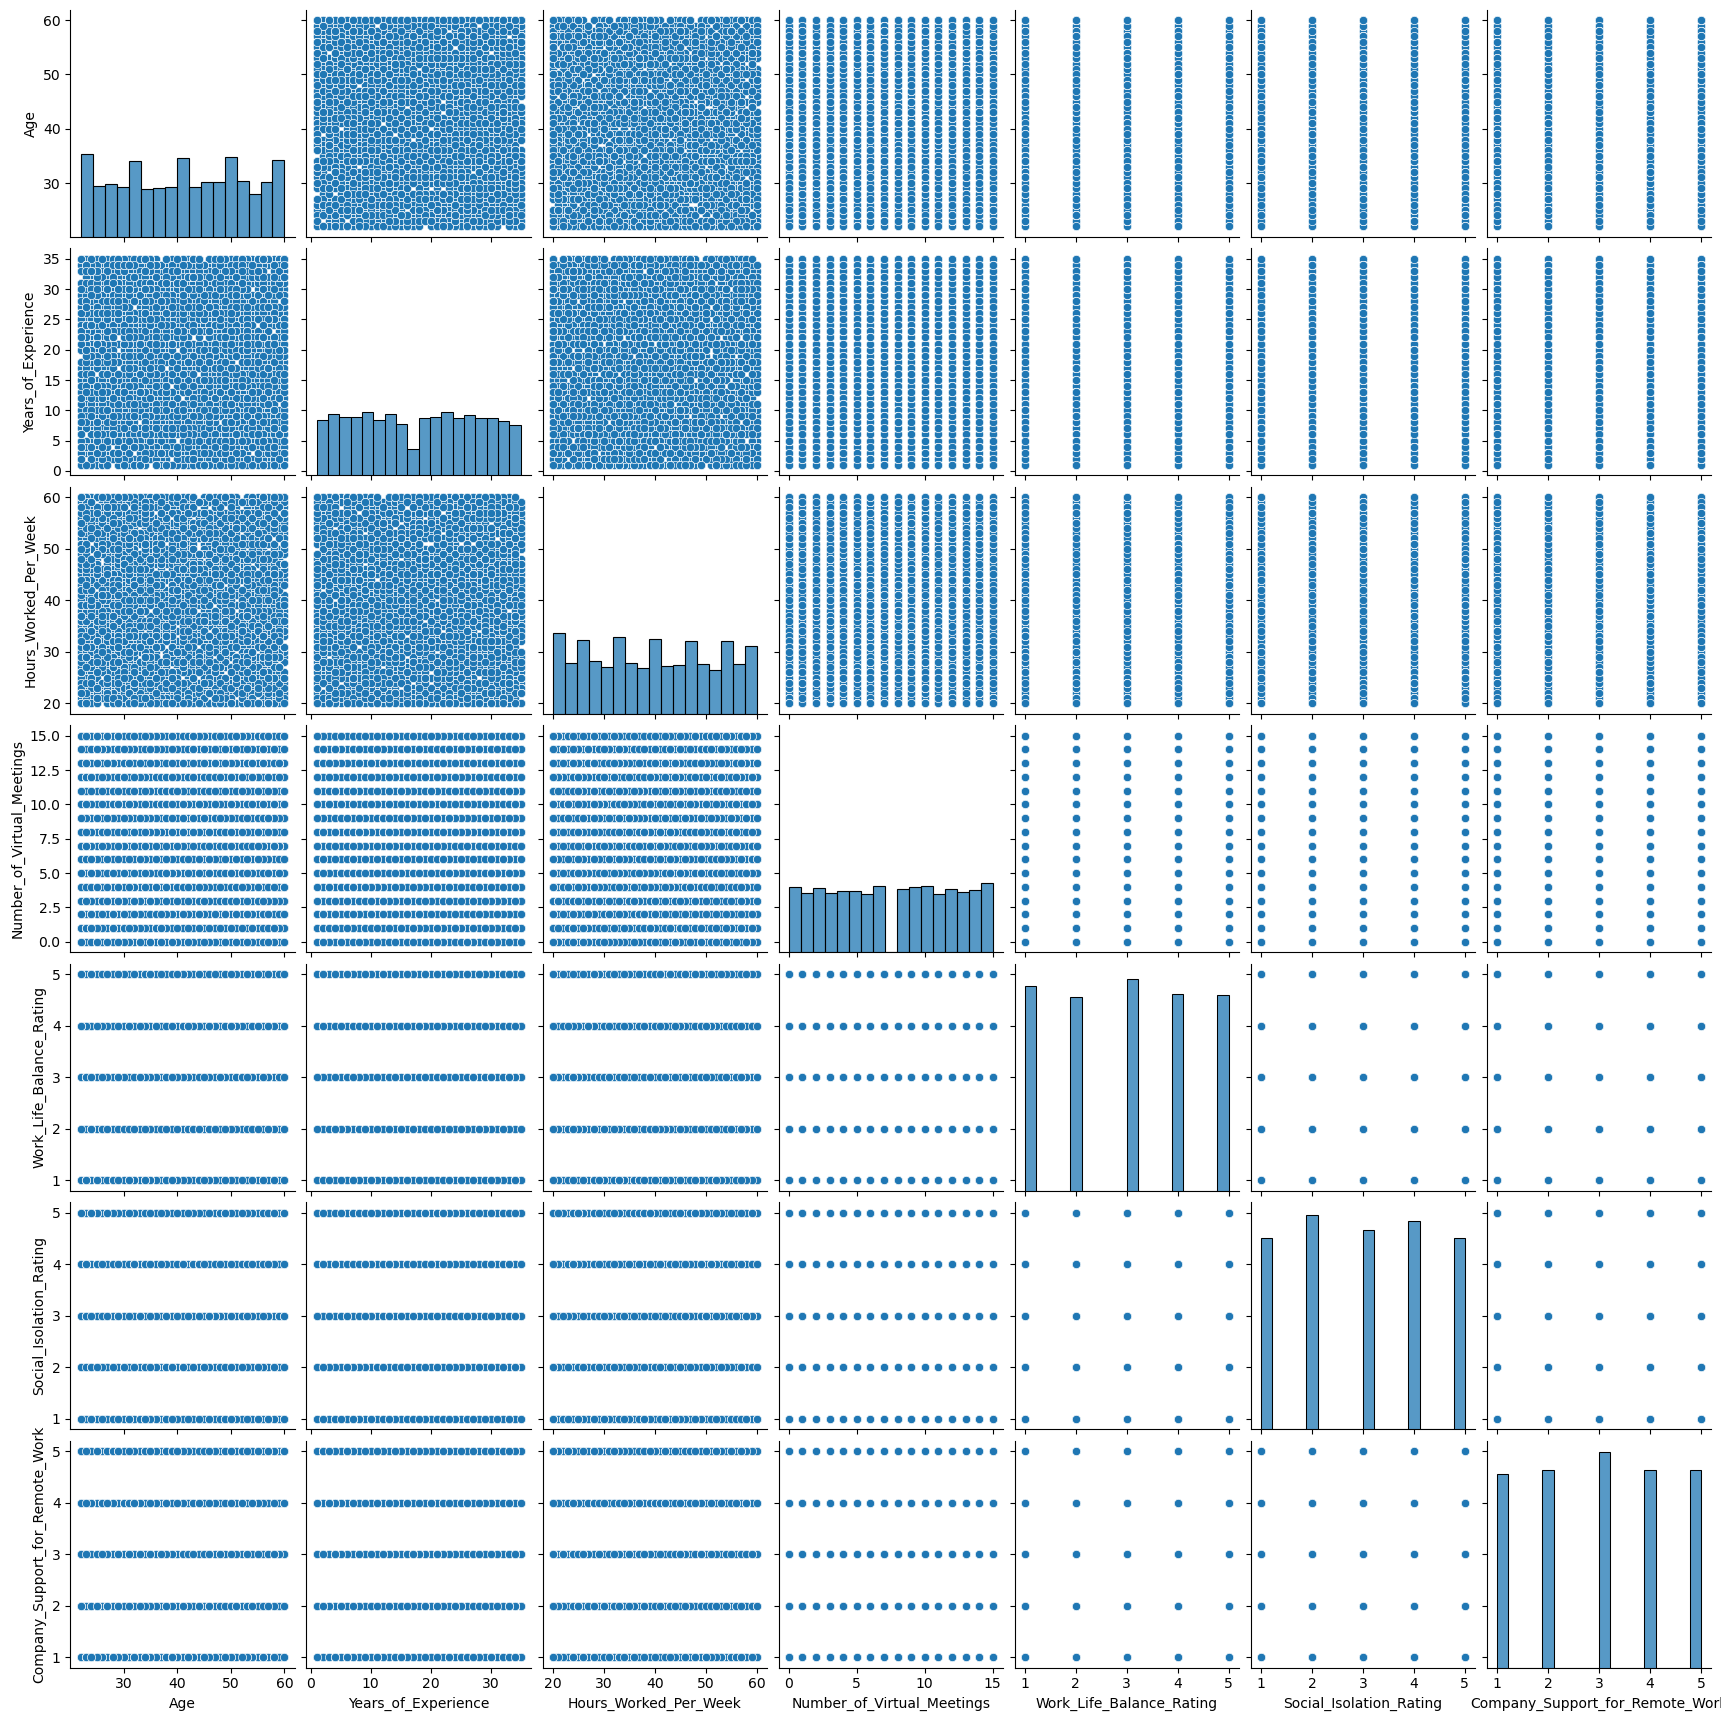

In [131]:
plt.figure(figsize=(10, 4))
sns.pairplot(df)

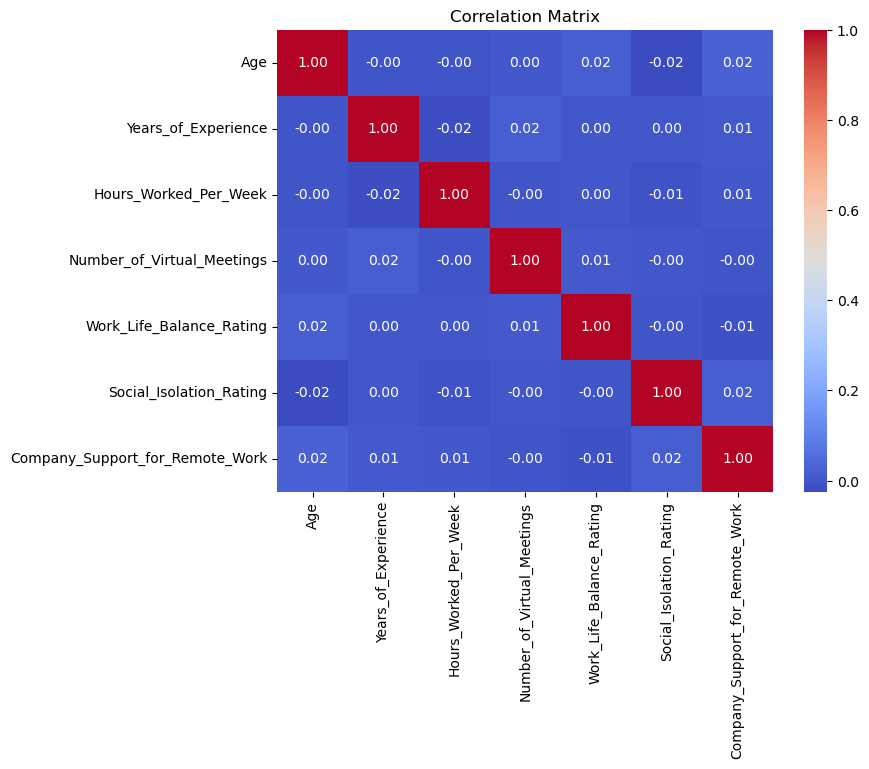

In [132]:
import matplotlib.pyplot as plt 


correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

## Model Selection, Feature Engineering, and Normalization

### The Problem

We predict the mental health condition of a person based on the features in the dataset.

### Model Selection

The basic and most common models for classification are:

- Logistic Regression
- Decision Trees
- Random Forest
- Support Vector Machines
- K-Nearest Neighbors

We will use the Decision Trees model.

### Feature Engineering

##### Enconder

In [133]:
# Drop of Employee_ID
df = df.drop(columns='Employee_ID')

In [134]:
df

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,No Activity,Poor,North America
3,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,No Activity,Poor,Europe
4,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,No Condition,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,No Activity,Average,Africa
4997,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,No Condition,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [135]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
categorical_columns = ['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Region', 'Stress_Level', 'Productivity_Change', 'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Sleep_Quality', 'Access_to_Mental_Health_Resources']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

##### Normalization

In [136]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For Age, Years_of_Experience, Number_of_Virtual_Meetings, Hours_Worked_Per_Week
for col in ['Age', 'Years_of_Experience', 'Number_of_Virtual_Meetings', 'Hours_Worked_Per_Week']:
    scaler = MinMaxScaler()
    df[col] = scaler.fit_transform(df[[col]])

## Machine Learning

#### Splitting the Data

In [140]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=['Mental_Health_Condition'])
y = df['Mental_Health_Condition']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#### Training the Model

In [141]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Evaluating the Model

In [147]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_valid)

print(classification_report(y_valid, y_pred, target_names=clf.classes_))

# precision = TP / (TP + FP)
# recall = TP / (TP + FN)

              precision    recall  f1-score   support

     Anxiety       0.29      0.29      0.29       263
     Burnout       0.26      0.25      0.25       255
  Depression       0.24      0.24      0.24       254
No Condition       0.20      0.21      0.20       228

    accuracy                           0.25      1000
   macro avg       0.25      0.25      0.25      1000
weighted avg       0.25      0.25      0.25      1000



[Text(0.3788445536024016, 0.9791666666666666, 'x[6] <= 0.013\ngini = 0.75\nsamples = 3000\nvalue = [752, 776, 744, 728]'),
 Text(0.01949857625912084, 0.9375, 'x[0] <= 0.855\ngini = 0.712\nsamples = 84\nvalue = [10, 21, 20, 33]'),
 Text(0.1991715649307612, 0.9583333333333333, 'True  '),
 Text(0.0151494927923118, 0.8958333333333334, 'x[11] <= 1.5\ngini = 0.733\nsamples = 70\nvalue = [10, 20, 18, 22]'),
 Text(0.010722548496173696, 0.8541666666666666, 'x[17] <= 4.5\ngini = 0.72\nsamples = 51\nvalue = [7.0, 10.0, 17.0, 17.0]'),
 Text(0.006139882541377469, 0.8125, 'x[17] <= 0.5\ngini = 0.704\nsamples = 44\nvalue = [4, 10, 13, 17]'),
 Text(0.002135611318739989, 0.7708333333333334, 'x[15] <= 1.5\ngini = 0.568\nsamples = 9\nvalue = [0, 5, 3, 1]'),
 Text(0.0014237408791599928, 0.7291666666666666, 'x[1] <= 0.5\ngini = 0.56\nsamples = 5\nvalue = [0, 1, 3, 1]'),
 Text(0.0007118704395799964, 0.6875, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]'),
 Text(0.002135611318739989, 0.6875, 'x[1] <= 1.5\ng

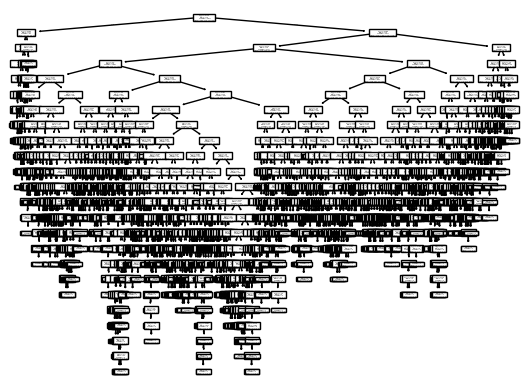

In [151]:
from sklearn.tree import plot_tree
plot_tree(clf, proportion=True)
plt.show()

#### Hyperparameter Tuning

In [156]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

features = X.columns.to_list()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20],
    'min_impurity_decrease': [0.0, 0.01],
    'splitter': ['best', 'random']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the model on the validation set
y_valid_pred = grid_search.predict(X_valid)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
y_test_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': grid_search.best_estimator_.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
[CV] END criterion=gini, max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterio

In [158]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models

ModuleNotFoundError: No module named 'lazypredict'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset

# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Mental_Health_Condition', 'Region']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Define features and target
features = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings',
            'Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Gender', 'Job_Role', 'Work_Location']

X = df[features]
y = df['Stress_Level']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the model on the validation set
y_valid_pred = grid_search.predict(X_valid_scaled)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
y_test_pred = grid_search.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': grid_search.best_estimator_.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)